In [3]:
from sklearn import datasets
boston = datasets.load_boston()

In [4]:
X = boston.data
y = boston.target

In [13]:
from sklearn.model_selection import KFold

kf = KFold(n_splits =10, shuffle=True)

for train_index, test_index in kf.split(X):
    print("TRAIN - ",len(train_index))
    print("TEST -", len(test_index))

TRAIN -  455
TEST - 51
TRAIN -  455
TEST - 51
TRAIN -  455
TEST - 51
TRAIN -  455
TEST - 51
TRAIN -  455
TEST - 51
TRAIN -  455
TEST - 51
TRAIN -  456
TEST - 50
TRAIN -  456
TEST - 50
TRAIN -  456
TEST - 50
TRAIN -  456
TEST - 50


In [16]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits = 10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index],y[train_index])
    ridge_regressor.fit(X[train_index],y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))

sum(lasso_mse)/10, sum(ridge_mse) /10


(34.46408458830233, 34.07824620925929)

In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X,y,cv=10,scoring='neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X,y,cv=10,scoring='neg_mean_squared_error')

print(np.mean(lasso_scores), np.mean(ridge_scores))

-34.46408458830233 -34.07824620925929


In [22]:
from sklearn.model_selection import cross_validate
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

scoring = ['neg_mean_squared_error', 'r2']

lasso_scores = cross_validate(lasso_regressor, X, y, cv=10, scoring=scoring)
ridge_scores= cross_validate(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
lasso_scores

{'fit_time': array([0.00199556, 0.0009985 , 0.00199437, 0.00099802, 0.00099778,
        0.00099874, 0.00099707, 0.00199485, 0.00199556, 0.00299048]),
 'score_time': array([0.00199413, 0.00099802, 0.        , 0.00099802, 0.00099659,
        0.00099635, 0.0009973 , 0.00099707, 0.00099778, 0.00099874]),
 'test_neg_mean_squared_error': array([ -11.75904887,  -17.87218543,  -10.52504673,  -60.79224355,
         -46.77806854,  -40.75196077,  -17.30562005, -102.67754279,
         -22.8731834 ,  -13.30594575]),
 'test_r2': array([ 0.66289033,  0.33452353, -0.50043664,  0.38035161,  0.33638098,
         0.4584511 , -0.0816218 ,  0.31138236, -0.21362102,  0.29459703])}

In [24]:
from sklearn.model_selection import cross_val_score
import numpy as np

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

kf = KFold(n_splits=10, shuffle=True)

lasso_scores = cross_val_score(lasso_regressor, X,y,cv=kf,scoring='neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X,y,cv=kf,scoring='neg_mean_squared_error')

print(np.mean(lasso_scores), np.mean(ridge_scores))

-28.3620252456465 -23.97180483312824


In [26]:
from sklearn.model_selection import LeaveOneOut

test = [1,2,3,4]
loo = LeaveOneOut()
for train, test in loo.split(test):
    print(train,test)

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [27]:
loo = LeaveOneOut()

lasso_scores = cross_val_score(lasso_regressor, X,y,cv=loo,scoring='neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X,y,cv=loo,scoring='neg_mean_squared_error')

print(np.mean(lasso_scores), np.mean(ridge_scores))


-28.409266762049334 -23.862836317209965


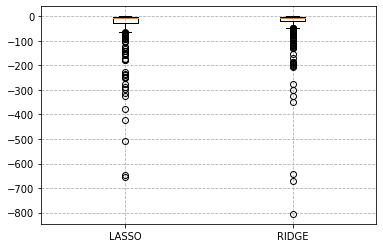

In [30]:
import matplotlib.pyplot as plt
labels = ["LASSO","RIDGE"]
plt.boxplot((lasso_scores, ridge_scores),labels=labels)
plt.grid(linestyle="--")
plt.show()

In [39]:
def rmse(predictions, targets):
    return np.sqrt(((predictions-targets)**2).mean())

In [51]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.01
max_iter = 100

In [69]:
from sklearn.model_selection import train_test_split

X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

sgd_regressor = SGDRegressor(eta0 = eta0, max_iter = max_iter, warm_start=True, learning_rate="constant")

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(X_train_dataset,y_train_dataset, test_size=0.2, random_state=42)
sgd_regressor.fit(X_train,y_train)

for i in range(300):
    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred,y_true))
    
    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor)
    
    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()
    
    sgd_regressor = SGDRegressor(eta0=eta0,max_iter=max_iter, warm_start=True, learning_rate="constant")
    
    sgd_regressor.fit(X_train,y_train,coef_init=coef, intercept_init=intercept)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


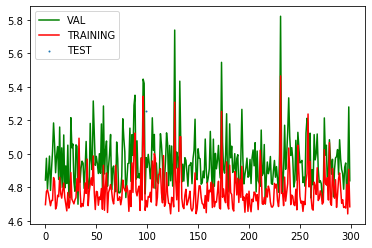

In [57]:
plt.plot(range(len(rmse_val_score)), rmse_val_score, c="G", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score,  c="r", label="TRAINING")
plt.scatter(99, rmse(y_test,sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()

In [67]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.0001
max_iter = 100

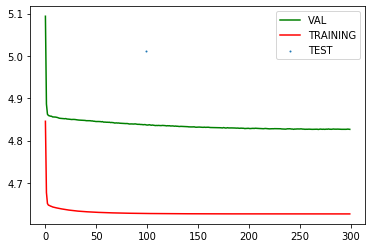

In [70]:
plt.plot(range(len(rmse_val_score)), rmse_val_score, c="G", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score,  c="r", label="TRAINING")
plt.scatter(99, rmse(y_test,sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()